In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [9]:
df = pd.read_csv("apps.csv")
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.0+ MB


In [17]:
df.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [19]:

df.dropna(inplace=True)

In [27]:
df['Price'] = df['Price'].replace({'\\$', ''}, regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


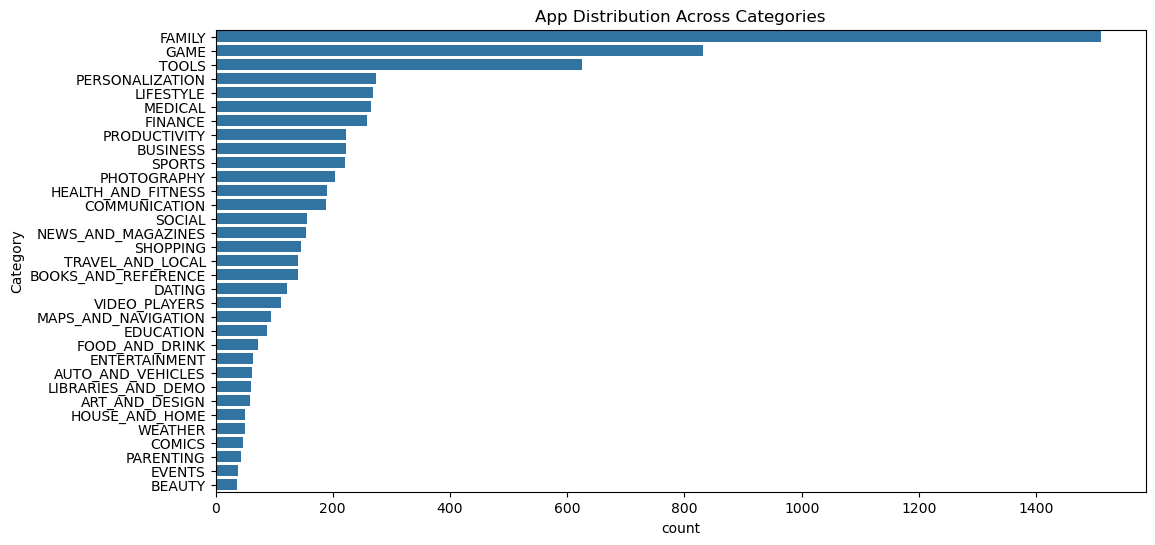

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index)
plt.title("App Distribution Across Categories")
plt.show()


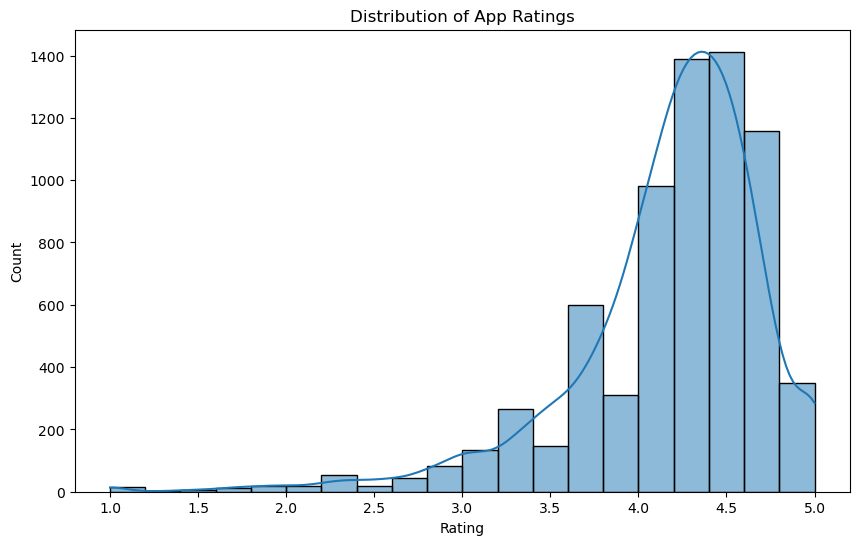

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'].dropna(), bins=20, kde=True)
plt.title("Distribution of App Ratings")
plt.show()

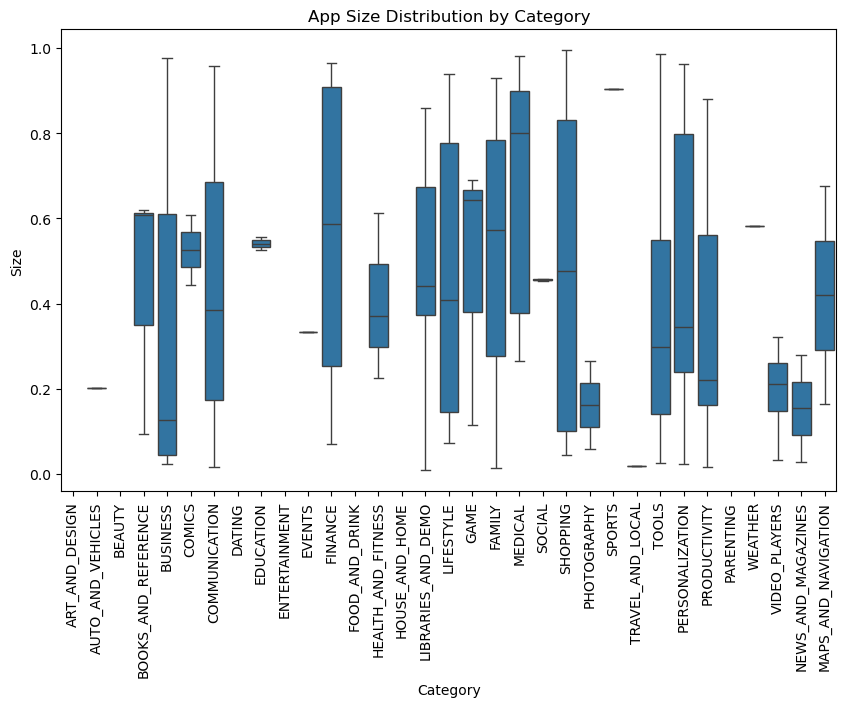

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Size', data=df)
plt.xticks(rotation=90)
plt.title("App Size Distribution by Category")
plt.show()

In [49]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt


In [51]:
df_reviews = pd.read_csv("user_reviews.csv.zip")

In [53]:
df_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [55]:
review_column = "Review" if "Review" in df_reviews.columns else df_reviews.columns[0]

In [57]:
df_reviews = df_reviews.dropna(subset=[review_column])

In [59]:
df_reviews['Sentiment'] = df_reviews[review_column].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

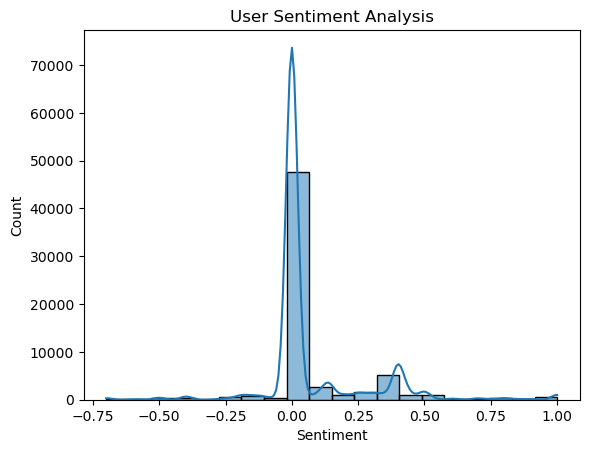

In [60]:
sns.histplot(df_reviews['Sentiment'], bins=20, kde=True)
plt.title("User Sentiment Analysis")
plt.show()

In [35]:
print("Data analysis complete. Consider integrating interactive visualizations for deeper insights.")

Data analysis complete. Consider integrating interactive visualizations for deeper insights.
